<a href="https://colab.research.google.com/github/machine-perception-robotics-group/MPRGDeepLearningLectureNotebook/blob/master/13_rnn/01_03_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# リカレントニューラルネットワーク
リカレントニューラルネットワークは，系列データを扱うことができるニューラルネットワークです． 例えば，「今日は良い天気です」という文章において，「今日は」，「良い」という時系列データを与えると，次に現れる単語として「天気」を予測するという問題です． リカレントニューラルネットワークを利用することで，過去の系列情報から文脈の流れを考慮した予測ができるようになります． 応用例として，３０分後の電力を予測する，翌日の株価を予測するなどの予測モデル，音声認識や機械翻訳などがあります．

##リカレントニューラルネットワークの種類
リカレントニューラルネットワークにはいくつかの種類があります．

* Elman Network：一般的なリカレントニューラルネットワーク．１時刻前の情報を内部状態として，現時刻の入力と合わせて中間層に与える
* Jordan Network：１時刻前の出力層の情報を現時刻の入力と合わせて中間層に与える
* Echo state network (ESN)：一部の重みを乱数で初期化し，更新しない．中間層内のユニットは相互結合する
* Long Short-Term Memory (LSTM)：内部情報を記憶するメモリセルを持ち，複数のゲートによってメモリセルの情報を書き換えたり出力したりする
* Gated Recurrent Unit (GRU)：内部情報の保持方法をLSTMよりもシンプルな構造にしたリカレントニューラルネットワーク 
* Bidirectional RNN：過去の情報だけでなく，未来の情報も利用する双方向のリカレントニューラルネットワーク


## Elman Network
リカレントニューラルネットワークは，普通のニューラルネットワークと同様に，入力層，中間層，出力層から構成されます．大きな違いは，中間層の出力が中間層の入力につながっている点です．具体的には，1時刻前の中間層の出力が次の時刻の中間層に入力されます．これにより，過去の情報を伝搬することができ，過去を考慮した出力が可能です．


<img src="https://drive.google.com/uc?export=view&id=1BfaK5R6uzThv8bJ-A8ON-rEp2C4h70wZ" width = 80%>







##リカレントニューラルネットワークの学習
リカレントニューラルネットワークは，時系列データを逐次与えます．この流れを展開すると
ニューラルネットワークを時間方向につなげた大きなネットワークとみなすことができます．
そのため，リカレントニューラルネットワークの学習にもニューラルネットワークと同様に誤差逆伝播法を用いることができます．
リカレントニューラルネットワークでの誤差逆伝播法は， Back-propagation through time (BPTT)法と呼ばれています．

まず，図の黒矢印に従い，系列データを時刻$t=0$から順伝播します．
ネットワークは時刻ごとに別々にあるのではなく，１つのネットワークに対して逐次データを入力します．
その時，各時刻における各層の値は変わっていくので，それらを記憶しておきます．
また，順伝播時に各時刻における誤差を算出しておきます．
誤差関数には，平均二乗誤差関数を利用することが多いです．

時刻t=Tまで系列データの順伝播が終わると学習開始となります．
学習は，ニューラルネットワークの誤差逆伝播法と同様に，BPTTでも誤差の勾配を求めて結合重みを更新します．
その際，時刻をさかのぼるように，時刻t=Tの出力層から始めます．
学習では，以下の３箇所の結合重みを順番に更新します．
* 時刻tの出力層から時刻tの中間層間の結合重み
* 時刻tの中間層から時刻t-1の中間層間の結合重み
* 時刻tの中間層から時刻tの入力層間の結合重み

<img src="https://drive.google.com/uc?export=view&id=1ubl3760d5AlriNXFQEuPhnAIOPlKyq4C" width = 70%>


## 勾配消失問題
リカレントニューラルネットワークは，系列データの文脈を捉えて推定を行うことができます．
この時，系列の長さに関係なく，系列データの文脈を反映せることが重要です．
すなわち，時刻tから離れた遠い過去の時刻のデータを時刻tの出力に反映しなければなりません．
しかし，リカレントニューラルネットワークを時間方向に展開すると深いニューラルネットワークと
みなすことができ，誤差逆伝播時に誤差が入力に近い階層まで伝播させることが困難です．
系列データが長い場合，リカレントニューラルネットワークでも勾配消失問題が生じます．
したがって，リカレントニューラルネットワークでは，10時刻程度のデータが限界となることが多いです．


## Long Short Term Memory(LSTM)
LSTMは，リカレントニューラルネットワークと同様に，時系列データを扱うニューラルネットモデルです．
リカレントニューラルネットワークは，系列データにおける過去のデータを考慮することができますが，
10時刻程度しか考慮できませんでした．
LSTMは，内部状態を記憶するメモリセルと３つのゲートで構成されています．
３つのゲートは，メモリセルの値が次時刻でどれだけ保持されるかを調節する忘却ゲート，メモリセルに加算される値を調節する入力ゲート，
メモリセルの値が次の層にどれだけ影響を及ぼすかを調節する出力ゲートです．
このような特徴を持つメモリセルと３つのゲートを駆使して，勾配消失問題を解決し，短期と長期の記憶を両立した内部情報の保持方法を実現しています．
ここで，σはシグモイド関数，tanhはハイパボリックタンジェント関数です．
忘却ゲートは赤線，入力ゲートは緑線，出力ゲートは青線に沿って処理をします．


<img src="https://drive.google.com/uc?export=view&id=1KOj4jdCVyc8VzRfQKA1dzZe5cNk3IYNe" width = 50%>


## Gated Reccurent Unit (GRU)
LSTMは非常に複雑な構造ですが，長期と短期の記憶の両立ができる特徴があります．
同様の特徴をよりシンプルな構造で実現した方法がGated Recurrent Unit (GRU)です．
GRUは，図ような構造をしています．
LSTMとの大きな違いはメモリセルがないことです．
また，LSTMでは，３種類のゲートがありましたが，GRUではリセットゲートと更新ゲートの２種類のゲートとなります．
リセットゲートは，入力と前時刻の中間層の値から求めます．
活性化関数にはシグモイド関数を用います．

<img src="https://drive.google.com/uc?export=view&id=1zJC99T-bMmWbzVibuM7OYB0p-Gwv5s1f" width = 40%>

# リカレントニューラルネットワークによる電力予測
リカレントニューラルネットワークを使って電力予測を行います．
ここでは，Long Short Term Memory（LSTM）を使用します．

##データのダウンロード
プログラムの動作に必要なデータをダウンロードし，zipファイルを解凍します．

In [ ]:
!wget -q http://www.mprg.cs.chubu.ac.jp/tutorial/ML_Lecture/SOLAR/data.zip
!unzip -q data.zip

データを確認してみます．最初の７つの値が曜日のone-hot vector，次の２４個の値は時間のone-hot vector，残りが電力，気温，湿度です．

In [ ]:
import numpy as np
!ls data/train
tmp_data = np.load("./data/train/BEMS_RNN_train_data.npy")
print(tmp_data[0])
print(tmp_data.shape)

BEMS_RNN_train_data.npy  BEMS_RNN_train_labels.npy
[0.    0.    0.    1.    0.    0.    0.    1.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.364 0.216 0.89 ]
(50000, 34)


## モジュールのインポート
はじめに必要なモジュールをインポートします．


### GPUの確認
GPUを使用した計算が可能かどうかを確認します．



In [ ]:
from time import time
from os import path
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# GPUの確認
use_cuda = torch.cuda.is_available()
print('Use CUDA:', use_cuda)

Use CUDA: True


## データセットオブジェクトの作成

電力データセットに対する，PyTorchのデータセットオブジェクト (`torch.utils.data.Dataset`) を作成します．
`Dataset`は，指定したデータセットを読み込み，学習やテストのためにデータを準備し生成するためのクラスです．
これまでの実習で使用したMNISTやCIFARデータセットはPyTorch (torchvision) 内に準備されているデータセットオブジェクトでした．
今回用いるデータセットは，torchvisonには存在しないため，自身で定義を行います．

まず，`__init__`関数により，必要なデータを読み込みます．
この時，`__init__`関数の引数を指定します．
`root`は読み込むデータセットを配置しているディレクトリ，`train`は学習またはテストデータのどちらを扱うかを指定する変数，`delay`は入力された情報の何時刻後を正解として用意するかを指定する変数，`time_window`は1サンプルあたり何時刻のデータを準備するかをしてする変数です．

まず，`root`および`train`変数から，学習またはテストデータを読み込みます．
その後，`delay`で指定した時刻を元に正解データを準備します．
最後に，`time_window`で指定した時間窓で1サンプルとなるように，データを作成し，`self.data`および`self.label`にデータを格納します．
これにより，`self.data`，`self.label`に入力データおよび正解データを格納します．

`__getitem__`関数で，指定したインデックス（`item`）のデータを取り出し，返します．

`__len__`関数は，このデータセットが保有するサンプル数を返すように定義を行います．

In [ ]:
class BEMSDataset(torch.utils.data.Dataset):

    def __init__(self, root="./data", train=True, delay=1, time_window=10):
        super().__init__()
        self.root = root
        self.train = train
        self.delay = delay
        self.time_window = time_window

        # データの読み込み
        if self.train:
            data_src = np.load(path.join(self.root, 'train', 'BEMS_RNN_train_data.npy'))
            label_src = np.load(path.join(self.root, 'train', 'BEMS_RNN_train_labels.npy'))
        else:
            data_src  = np.load(path.join(self.root, 'test', 'BEMS_RNN_test_data.npy'))
            label_src = np.load(path.join(self.root, 'test', 'BEMS_RNN_test_labels.npy'))

        data_src = np.asarray(data_src[:-self.delay])
        label_src = np.asarray(label_src[self.delay:])

        self.data = []
        self.label = []
        for frame_i in range(len(data_src) - self.time_window):
            self.data.append(data_src[frame_i:frame_i+self.time_window])
            self.label.append(label_src[frame_i:frame_i+self.time_window])

        self.data = np.asarray(self.data)
        self.label = np.asarray(self.label)

    def __getitem__(self, item):
        d = self.data[item, :]
        l = self.label[item, :]
        return d, l

    def __len__(self):
        return self.data.shape[0]

## ネットワークモデルの定義
リカレントニューラルネットワークを定義します．
ここでは，RNN層1層，全結合層1層から構成されるネットワークとします．

`forward`関数では，定義した層を接続して処理するように記述します．
この時，全結合層から出力された値はシグモイド関数へと入力され，最終的な出力結果を求めます．

In [ ]:
class RNN_Net(nn.Module):
    def __init__(self):
        super(RNN_Net, self).__init__()
        self.rnn = nn.RNNCell(34, 128)
        self.l1 = nn.Linear(128, 1)
    
    def forward(self, x, hx):
        hx = self.rnn(x, hx)
        h = self.l1(hx)
        return h, hx

## ネットワークの作成
上のプログラムで定義したネットワークを作成します．


In [ ]:
model = RNN_Net()
if use_cuda:
    model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## 学習
先ほど定義したデータセットと作成したネットワークを用いて，学習を行います．

1回の誤差を算出するデータ数（ミニバッチサイズ）を100，学習エポック数を20とします．
また，1サンプルあたりのデータの長さ（time window）を10に指定します．

次にデータローダーを定義します．
データローダーでは，上で読み込んだデータセット（`train_data`）を用いて，for文で指定したミニバッチサイズでデータを読み込むオブジェクトを作成します．
この時，`shuffle=True`と設定することで，読み込むデータを毎回ランダムに指定します．

次に，誤差関数を設定します．
今回は，連続値を出力する回帰問題をあつかうため，`MSELoss`を`criterion`として定義します．

学習を開始します．

各更新において，学習用データと教師データをそれぞれ`data`と`label`とします．
まず，LSTMの隠れ状態とセル状態である`hx`と`cx`を`torch.zeros`を用いて初期化します．
この時，1次元目のサイズはバッチサイズに対応するように，`data`のサイズから自動的に決定します．

その後，学習モデルに`data`を与えて各クラスの確率yを取得します．
今回はLSTMを用いて時系列データを順次処理するため，for文を用いて，各時刻のデータを順番に入力し，結果を得ます．
そして，各クラスの確率yと教師ラベルtとの誤差を`criterion`で算出します．
また，認識精度も算出します．
そして，誤差をbackward関数で逆伝播し，ネットワークの更新を行います．

In [ ]:
# ミニバッチサイズ・エポック数の設定
batch_size = 100
epoch_num = 20
time_window = 10

# データセットの読み込み・データローダーの設定
train_data = BEMSDataset(root="./data", train=True, delay=1, time_window=time_window)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# 誤差関数の設定
criterion = nn.MSELoss()
if use_cuda:
    criterion.cuda()

# ネットワークを学習モードへ変更
model.train()

start = time()
for epoch in range(1, epoch_num+1):
    total_loss = 0

    for data, label in train_loader:
        hx = torch.zeros(data.size()[1], 128)
        
        if use_cuda:
            data = data.cuda()
            label = label.cuda()
            hx = hx.cuda()
    
        accum_loss = 0.0
        
        for idx_window in range(time_window):
            y, hx = model(data[idx_window], hx)
            loss = criterion(y, label[idx_window])
            accum_loss += loss
            total_loss += loss.item()
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
    elapsed_time = time() - start
    print("epoch: {}, mean loss: {}, elapsed_time: {}".format(epoch, total_loss, elapsed_time))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1, mean loss: 76.50274646155958, elapsed_time: 4.331270217895508
epoch: 2, mean loss: 10.25637414686048, elapsed_time: 8.503899097442627
epoch: 3, mean loss: 9.365826571257315, elapsed_time: 12.66421890258789
epoch: 4, mean loss: 9.135186724550593, elapsed_time: 16.787801265716553
epoch: 5, mean loss: 8.158202005861227, elapsed_time: 20.93307590484619
epoch: 6, mean loss: 8.037326727067295, elapsed_time: 25.0413556098938
epoch: 7, mean loss: 8.094511648465275, elapsed_time: 29.18189525604248
epoch: 8, mean loss: 8.283846797473245, elapsed_time: 33.35047173500061
epoch: 9, mean loss: 9.584958290427734, elapsed_time: 37.478264570236206
epoch: 10, mean loss: 7.793327488488302, elapsed_time: 41.62498426437378
epoch: 11, mean loss: 8.1909967610936, elapsed_time: 45.8157639503479
epoch: 12, mean loss: 8.163978681595779, elapsed_time: 49.963319540023804
epoch: 13, mean loss: 8.165907254774346, elapsed_time: 54.06389284133911
epoch: 14, mean loss: 8.75052844829193, elapsed_time: 58.2593

## 評価
学習したネットワークモデルを用いて評価（予測結果の可視化）を行います．
可視化にはmatplotlibを用います

mse error : 0.0034


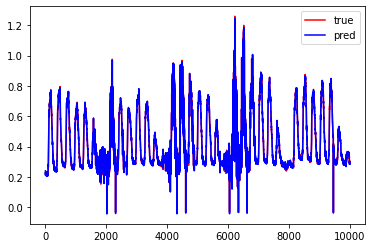

In [ ]:
# データセットの読み込み・データローダーの設定
test_data = BEMSDataset(root="./data", train=False, delay=1, time_window=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

# ネットワークを評価モードへ変更
model.eval()

prediction_result = []
        
# 評価の実行
hx = torch.zeros(1, 128)
if use_cuda:
    hx = hx.cuda()
    
with torch.no_grad():
    for data, label in test_loader:
        
        if use_cuda:
            data = data.cuda()

        y, hx = model(data[0], hx)
        
        prediction_result.append(y.item())

prediction_result = np.array(prediction_result).flatten()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(prediction_result, test_data.label)
print("mse error : {:.4f}".format(mse))


# 結果の表示
plt.figure()
plt.plot(test_data.label, color='red', label='true')
plt.plot(prediction_result.tolist(), color='blue', label='pred')
plt.legend()
plt.show()

## LSTMによる学習と評価
次に，LSTMを利用します．
LSTM層はRecurrent Neural Networkの一種です．
LSTMへの入力サイズはNoneとし，データにより変更できるようにしておきます．

`forward`関数では，定義した層を接続して処理するように記述します．
LSTMをはじめとするRecurrent Neural Networkでは，内部に過去の入力情報から計算した値を保持しています．

In [ ]:
class LSTM_Net(nn.Module):
    def __init__(self):
        super(LSTM_Net, self).__init__()
        self.lstm = nn.LSTMCell(34, 128)
        self.l1 = nn.Linear(128, 1)
    
    def forward(self, x, hx, cx):
        hx, cx = self.lstm(x, (hx, cx))
        h = self.l1(hx)
        return h, hx, cx

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1, mean loss: 244.73170928086802, elapsed_time: 4.267169713973999
epoch: 2, mean loss: 113.77333269634028, elapsed_time: 8.473569869995117
epoch: 3, mean loss: 48.428830161011774, elapsed_time: 12.651633024215698
epoch: 4, mean loss: 22.46567279358861, elapsed_time: 16.764139890670776
epoch: 5, mean loss: 11.92647042624526, elapsed_time: 20.868235111236572
epoch: 6, mean loss: 11.432593889898428, elapsed_time: 24.950107097625732
epoch: 7, mean loss: 9.205512976010937, elapsed_time: 29.027778148651123
epoch: 8, mean loss: 8.240631517511787, elapsed_time: 33.047635555267334
epoch: 9, mean loss: 10.237312478935564, elapsed_time: 37.096102237701416
epoch: 10, mean loss: 8.572833480081925, elapsed_time: 41.16614246368408
epoch: 11, mean loss: 7.620714347898301, elapsed_time: 45.30565905570984
epoch: 12, mean loss: 8.631349998704493, elapsed_time: 49.54700493812561
epoch: 13, mean loss: 8.331415899829949, elapsed_time: 53.75393557548523
epoch: 14, mean loss: 7.509924166554725, elapsed

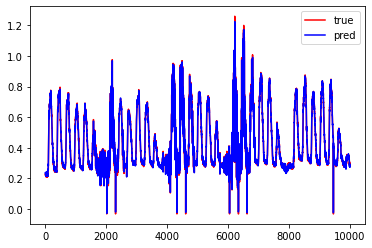

In [ ]:
model = LSTM_Net()
if use_cuda:
    model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# ミニバッチサイズ・エポック数の設定
batch_size = 100
epoch_num = 20
time_window = 10

# データセットの読み込み・データローダーの設定
train_data = BEMSDataset(root="./data", train=True, delay=1, time_window=time_window)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# 誤差関数の設定
criterion = nn.MSELoss()
if use_cuda:
    criterion.cuda()

# ネットワークを学習モードへ変更
model.train()

start = time()
for epoch in range(1, epoch_num+1):
    total_loss = 0

    for data, label in train_loader:
        hx = torch.zeros(data.size()[1], 128)
        cx = torch.zeros(data.size()[1], 128)
        
        if use_cuda:
            data = data.cuda()
            label = label.cuda()
            hx = hx.cuda()
            cx = cx.cuda()
    
        accum_loss = 0.0
        
        for idx_window in range(time_window):
            y, hx, cx = model(data[idx_window], hx, cx)
            loss = criterion(y, label[idx_window])
            accum_loss += loss
            total_loss += loss.item()
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
    elapsed_time = time() - start
    print("epoch: {}, mean loss: {}, elapsed_time: {}".format(epoch, total_loss, elapsed_time))


# データセットの読み込み・データローダーの設定
test_data = BEMSDataset(root="./data", train=False, delay=1, time_window=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

# ネットワークを評価モードへ変更
model.eval()

prediction_result = []
        
# 評価の実行
hx = torch.zeros(1, 128)
cx = torch.zeros(1, 128)
if use_cuda:
    hx = hx.cuda()
    cx = cx.cuda()
    
with torch.no_grad():
    for data, label in test_loader:
        
        if use_cuda:
            data = data.cuda()

        y, hx, cx = model(data[0], hx, cx)
        
        prediction_result.append(y.item())

prediction_result = np.array(prediction_result).flatten()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(prediction_result, test_data.label)
print("mse error : {:.4f}".format(mse))


# 結果の表示
plt.figure()
plt.plot(test_data.label, color='red', label='true')
plt.plot(prediction_result.tolist(), color='blue', label='pred')
plt.legend()
plt.show()    

## GRUによる学習と評価
 次に，GRUも同様に実験してみます

In [ ]:
class GRU_Net(nn.Module):
    def __init__(self):
        super(GRU_Net, self).__init__()
        self.gru = nn.GRUCell(34, 128)
        self.l1 = nn.Linear(128, 1)
    
    def forward(self, x, hx):
        hx = self.gru(x, hx)
        h = self.l1(hx)
        return h, hx

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1, mean loss: 166.8242617425285, elapsed_time: 4.26959228515625
epoch: 2, mean loss: 45.54547241398541, elapsed_time: 8.455375671386719
epoch: 3, mean loss: 20.25164448022224, elapsed_time: 12.681343078613281
epoch: 4, mean loss: 13.114246724305076, elapsed_time: 16.883906602859497
epoch: 5, mean loss: 10.49331390274574, elapsed_time: 21.110711812973022
epoch: 6, mean loss: 11.307309782321795, elapsed_time: 25.413456916809082
epoch: 7, mean loss: 9.410005904433149, elapsed_time: 29.560181379318237
epoch: 8, mean loss: 8.523975519536464, elapsed_time: 33.80102467536926
epoch: 9, mean loss: 8.236877913816162, elapsed_time: 37.9807825088501
epoch: 10, mean loss: 7.515250989536895, elapsed_time: 42.22234892845154
epoch: 11, mean loss: 7.423421997391756, elapsed_time: 46.4966197013855
epoch: 12, mean loss: 9.22274977980642, elapsed_time: 50.80286526679993
epoch: 13, mean loss: 8.926684019180072, elapsed_time: 54.98663640022278
epoch: 14, mean loss: 8.93424828813204, elapsed_time: 59.

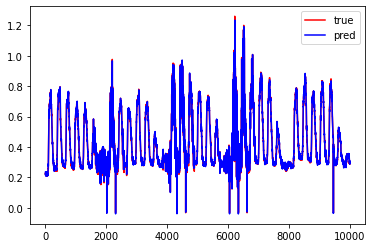

In [ ]:
model = GRU_Net()
if use_cuda:
    model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# ミニバッチサイズ・エポック数の設定
batch_size = 100
epoch_num = 20
time_window = 10

# データセットの読み込み・データローダーの設定
train_data = BEMSDataset(root="./data", train=True, delay=1, time_window=time_window)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# 誤差関数の設定
criterion = nn.MSELoss()
if use_cuda:
    criterion.cuda()

# ネットワークを学習モードへ変更
model.train()

start = time()
for epoch in range(1, epoch_num+1):
    total_loss = 0

    for data, label in train_loader:
        hx = torch.zeros(data.size()[1], 128)
        
        if use_cuda:
            data = data.cuda()
            label = label.cuda()
            hx = hx.cuda()
    
        accum_loss = 0.0
        
        for idx_window in range(time_window):
            y, hx = model(data[idx_window], hx)
            loss = criterion(y, label[idx_window])
            accum_loss += loss
            total_loss += loss.item()
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
    elapsed_time = time() - start
    print("epoch: {}, mean loss: {}, elapsed_time: {}".format(epoch, total_loss, elapsed_time))

# データセットの読み込み・データローダーの設定
test_data = BEMSDataset(root="./data", train=False, delay=1, time_window=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

# ネットワークを評価モードへ変更
model.eval()

prediction_result = []
        
# 評価の実行
hx = torch.zeros(1, 128)
if use_cuda:
    hx = hx.cuda()
    
with torch.no_grad():
    for data, label in test_loader:
        
        if use_cuda:
            data = data.cuda()

        y, hx = model(data[0], hx)
        
        prediction_result.append(y.item())

prediction_result = np.array(prediction_result).flatten()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(prediction_result, test_data.label)
print("mse error : {:.4f}".format(mse))

# 結果の表示
plt.figure()
plt.plot(test_data.label, color='red', label='true')
plt.plot(prediction_result.tolist(), color='blue', label='pred')
plt.legend()
plt.show()

## RNN 2層のネットワークモデル

In [ ]:
class RNN_Net(nn.Module):
    def __init__(self):
        super(RNN_Net, self).__init__()
        self.rnn1 = nn.RNNCell(34, 128)
        self.rnn2 = nn.RNNCell(128, 128)
        self.l1 = nn.Linear(128, 1)
    
    def forward(self, x, hx1, hx2):
        h1 = self.rnn1(x, hx1)
        h2 = self.rnn2(h1, hx2)
        h = self.l1(h2)
        return h, h1, h2



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1, mean loss: 127.86797529567662, elapsed_time: 6.468462944030762
epoch: 2, mean loss: 15.896989326540961, elapsed_time: 12.874625444412231
epoch: 3, mean loss: 11.151735868921378, elapsed_time: 19.408056497573853
epoch: 4, mean loss: 7.857003454586163, elapsed_time: 25.797465801239014
epoch: 5, mean loss: 8.247374535227323, elapsed_time: 32.23553442955017
epoch: 6, mean loss: 7.719028882208839, elapsed_time: 38.62718057632446
epoch: 7, mean loss: 7.9935608509129, elapsed_time: 45.0131299495697
epoch: 8, mean loss: 7.435781661996678, elapsed_time: 51.39110326766968
epoch: 9, mean loss: 9.570847326970295, elapsed_time: 57.674333333969116
epoch: 10, mean loss: 11.049318398602665, elapsed_time: 64.03723406791687
epoch: 11, mean loss: 7.6242650333008655, elapsed_time: 70.30812644958496
epoch: 12, mean loss: 8.48314043659228, elapsed_time: 76.5730812549591
epoch: 13, mean loss: 9.166548760130667, elapsed_time: 82.83135914802551
epoch: 14, mean loss: 9.066598176338687, elapsed_time: 8

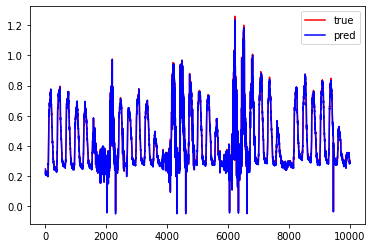

In [ ]:
model = RNN_Net()
if use_cuda:
    model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# ミニバッチサイズ・エポック数の設定
batch_size = 100
epoch_num = 20
time_window = 10

# データセットの読み込み・データローダーの設定
train_data = BEMSDataset(root="./data", train=True, delay=1, time_window=time_window)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# 誤差関数の設定
criterion = nn.MSELoss()
if use_cuda:
    criterion.cuda()

# ネットワークを学習モードへ変更
model.train()

start = time()
for epoch in range(1, epoch_num+1):
    total_loss = 0

    for data, label in train_loader:
        hx1 = torch.zeros(data.size()[1], 128)
        hx2 = torch.zeros(data.size()[1], 128)
        
        if use_cuda:
            data = data.cuda()
            label = label.cuda()
            hx1 = hx1.cuda()
            hx2 = hx2.cuda()
    
        accum_loss = 0.0
        
        for idx_window in range(time_window):
            y, hx1, hx2 = model(data[idx_window], hx1, hx2)
            loss = criterion(y, label[idx_window])
            accum_loss += loss
            total_loss += loss.item()
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
    elapsed_time = time() - start
    print("epoch: {}, mean loss: {}, elapsed_time: {}".format(epoch, total_loss, elapsed_time))

# データセットの読み込み・データローダーの設定
test_data = BEMSDataset(root="./data", train=False, delay=1, time_window=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

# ネットワークを評価モードへ変更
model.eval()

prediction_result = []
        
# 評価の実行
hx1 = torch.zeros(1, 128)
hx2 = torch.zeros(1, 128)
if use_cuda:
    hx1 = hx1.cuda()
    hx2 = hx2.cuda()
    
with torch.no_grad():
    for data, label in test_loader:
        
        if use_cuda:
            data = data.cuda()

        y, hx1, hx2 = model(data[0], hx1, hx2)
        
        prediction_result.append(y.item())

prediction_result = np.array(prediction_result).flatten()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(prediction_result, test_data.label)
print("mse error : {:.4f}".format(mse))

# 結果の表示
plt.figure()
plt.plot(test_data.label, color='red', label='true')
plt.plot(prediction_result.tolist(), color='blue', label='pred')
plt.legend()
plt.show()

##10時刻未来を予測する

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1, mean loss: 140.55099201061807, elapsed_time: 6.220205783843994
epoch: 2, mean loss: 38.84655721274021, elapsed_time: 12.55502462387085
epoch: 3, mean loss: 26.824803386085478, elapsed_time: 18.786288022994995
epoch: 4, mean loss: 26.966333062578542, elapsed_time: 25.093411684036255
epoch: 5, mean loss: 24.60241643461427, elapsed_time: 31.365782499313354
epoch: 6, mean loss: 23.049801546080403, elapsed_time: 37.60606384277344
epoch: 7, mean loss: 25.80796328488941, elapsed_time: 43.92696189880371
epoch: 8, mean loss: 27.642761072894473, elapsed_time: 50.25303268432617
epoch: 9, mean loss: 26.24070012558741, elapsed_time: 56.60816717147827
epoch: 10, mean loss: 23.000707157104415, elapsed_time: 62.855756521224976
epoch: 11, mean loss: 22.118926634438367, elapsed_time: 69.0956072807312
epoch: 12, mean loss: 29.791961687210204, elapsed_time: 75.34789991378784
epoch: 13, mean loss: 21.856086167831315, elapsed_time: 81.58529925346375
epoch: 14, mean loss: 25.03666623903291, elapsed

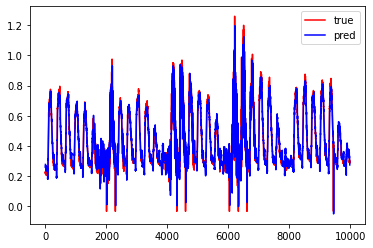

In [ ]:
model = RNN_Net()
if use_cuda:
    model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# ミニバッチサイズ・エポック数の設定
batch_size = 100
epoch_num = 20
time_window = 10

# データセットの読み込み・データローダーの設定
train_data = BEMSDataset(root="./data", train=True, delay=10, time_window=time_window)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# 誤差関数の設定
criterion = nn.MSELoss()
if use_cuda:
    criterion.cuda()

# ネットワークを学習モードへ変更
model.train()

start = time()
for epoch in range(1, epoch_num+1):
    total_loss = 0

    for data, label in train_loader:
        hx1 = torch.zeros(data.size()[1], 128)
        hx2 = torch.zeros(data.size()[1], 128)
        
        if use_cuda:
            data = data.cuda()
            label = label.cuda()
            hx1 = hx1.cuda()
            hx2 = hx2.cuda()
    
        accum_loss = 0.0
        
        for idx_window in range(time_window):
            y, hx1, hx2 = model(data[idx_window], hx1, hx2)
            loss = criterion(y, label[idx_window])
            accum_loss += loss
            total_loss += loss.item()
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
    elapsed_time = time() - start
    print("epoch: {}, mean loss: {}, elapsed_time: {}".format(epoch, total_loss, elapsed_time))

# データセットの読み込み・データローダーの設定
test_data = BEMSDataset(root="./data", train=False, delay=10, time_window=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

# ネットワークを評価モードへ変更
model.eval()

prediction_result = []
        
# 評価の実行
hx1 = torch.zeros(1, 128)
hx2 = torch.zeros(1, 128)
if use_cuda:
    hx1 = hx1.cuda()
    hx2 = hx2.cuda()
    
with torch.no_grad():
    for data, label in test_loader:
        
        if use_cuda:
            data = data.cuda()

        y, hx1, hx2 = model(data[0], hx1, hx2)
        
        prediction_result.append(y.item())

prediction_result = np.array(prediction_result).flatten()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(prediction_result, test_data.label)
print("mse error : {:.4f}".format(mse))

# 結果の表示
plt.figure()
plt.plot(test_data.label, color='red', label='true')
plt.plot(prediction_result.tolist(), color='blue', label='pred')
plt.legend()
plt.show()

#課題
　１．電力予測について，入力データを現在の電力・気温・湿度のみ入力してみましょう